In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
sys.setrecursionlimit(10**7)

In [60]:
def sort_checker(L):
    n=len(L)
    for i in range(1,n):
        if L[i-1]>L[i]:
            return False
    return True
def swap(L,a,b):
    s=L[a]
    L[a]=L[b]
    L[b]=s
    return
    
def bubble_sort(L):
    n=len(L)
    for i in range(n):
        for j in range(1,n-i):
            if L[j-1]>L[j]:
                swap(L,j-1,j)
    return L

def min_index(L,j):
    s=10**9
    n=j
    for i in range(j,len(L)):
        if s> L[i]:
            s=L[i]
            n=i
    return n

def selection_sort(L):
    for i in range(len(L)):
        s=min_index(L,i)
        swap(L,i,s)
    return L

def intersection_sort(L):
    for i in range(1,len(L)):
        for j in range(i,0,-1):
            if L[j]<L[j-1]:
                swap(L,j,j-1)
    return L


def merge(L,left,mid,right):
    if mid >= right:
         return L
    M=[0]*(right-left)
    i=left
    j=mid
    s=0
    while (i<mid) and (j < right):
        if L[i]<=L[j]:
            M[s]=L[i]
            i+=1
        else:
            M[s]=L[j]
            j+=1
        s+=1
    if i==mid:
        for t in range(j,right):
            M[s]=L[t]
            s+=1
    if j==right:
        for t in range(i,mid):
            M[s]=L[t]
            s+=1
    for t in range(left,right):
        L[t]=M[t-left]
    return L
    
def merge_sort(L):
    n=len(L)
    t=1
    while 2**t <= n:
        left=0
        right=2**t
        mid=2**(t-1)
        while left<n:
            L=merge(L,left,mid,right)
            left+=2**t
            mid+=2**t
            right+=2**t
            right=min(right,n)
        t+=1
    merge(L,0,2**(t-1),n)
    return L

def quick_sort(L,left,right):
    #print(L)
    if right-left<=1:
        return
    if right-left==2:
        if L[left+1]<L[left]:
            swap(L,left,left+1)
        return
    mid=(right+left)//2
    s=L[mid]
    i=left
    j=right-1
    while True:
        while L[i]<s:
            i+=1
        while L[j]>s:
            j-=1
        if i>=j:
            break
        swap(L,i,j)
        i+=1
        j-=1
    quick_sort(L,left,i)
    quick_sort(L,j+1,right)
    return 
    
def digit(a,i):
    return (a//2**i)%2
def radix_sort(L):
    k=len(bin(max(L)))-1
    for i in range(k):
        A0=[]
        A1=[]
        for a in L:
            if digit(a,i)==0:
                A0.append(a)
            else:
                A1.append(a)
        L=A0+A1               
    return L
        
def gravity_sort(L):
    k=max(L)
    n=len(L)
    A=[0]*k
    for a in L:
        for i in range(a):
            A[i]+=1
    i=0
    while i<n:
        s=A[0]
        for t in range(k):
            if s!=A[t]:
                break  
            A[t]-=1
        L[i]=t+1
        i+=1
    return L

def intersection_sort_alpha(L):
    for i in range(1,len(L)):
        for j in range(i,0,-1):
            if L[j]>=L[j-1]:
                break
            swap(L,j,j-1)
    return L

def intersection_sort_beta(L,i,k):
    N=len(L)
    for j in range(i+k,N,k):
        for l in range(j,0,-k):
            if L[l]>=L[l-k]:
                break
            swap(L,l,l-k)
    return L

def shell_sort(L):
    n=len(L)
    K=(len(bin(n))-2)-1
    for k in range(K-1,-1,-1):#間隔2**k, 個数2**(K-k)
        for i in range(2**k):
            intersection_sort_beta(L,i,2**k)
    return L

In [56]:
N=2**14
for i in range(100):
    L=[random.randint(1,10000)for i in range(N)]
    L=shell_sort(L)
    if not sort_checker(L):
        print(L)
        break    

In [63]:
def bubble_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    for i in range(n):
        for j in range(1,n-i):
            if L[j-1]>L[j]:
                swap(L,j-1,j)
            ##im = plt.plot(np.array(L)) 
        im = plt.bar(X,np.array(L),color='k') 
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_bubble.gif", writer="imagemagick")
    plt.show()
    return L


def selection_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    for i in range(len(L)):
        s=min_index(L,i)
        swap(L,i,s)
        im = plt.bar(X,np.array(L),color='k') 
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_selection.gif", writer="imagemagick")
    plt.show()
    return L

def intersection_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    for i in range(1,len(L)):
        for j in range(i,0,-1):
            if L[j]<L[j-1]:
                swap(L,j,j-1)
        im = plt.bar(X,np.array(L),color='k') 
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_intersection.gif", writer="imagemagick")
    plt.show()        
    return L
  
def merge_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    t=1
    while 2**t <= n:
        left=0
        right=2**t
        mid=2**(t-1)
        while left<n:
            L=merge(L,left,mid,right)
            left+=2**t
            mid+=2**t
            right+=2**t
            right=min(right,n)
            im = plt.bar(X,np.array(L),color='k') 
            ims.append(im)
        t+=1
    merge(L,0,2**(t-1),n)
    im = plt.bar(X,np.array(L),color='k') 
    ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_merge.gif", writer="imagemagick")
    plt.show()      
    return L 

def quick_sort_anime(L,left,right):
    im = plt.bar(X,np.array(L),color='k') 
    ims.append(im)
    if right-left<=1:
        return
    if right-left==2:
        if L[left+1]<L[left]:
            swap(L,left,left+1)
        return
    mid=(right+left)//2
    s=L[mid]
    i=left
    j=right-1
    while True:
        while L[i]<s:
            i+=1
        while L[j]>s:
            j-=1
        if i>=j:
            break
        swap(L,i,j)
        i+=1
        j-=1
    quick_sort_anime(L,left,i)
    quick_sort_anime(L,j+1,right)
    return 

def radix_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    k=len(bin(max(L)))-1
    for i in range(k):
        A0=[]
        A1=[]
        for a in L:
            if digit(a,i)==0:
                A0.append(a)
            else:
                A1.append(a)
        L=A0+A1      
        im = plt.bar(X,np.array(L),color='k') 
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_radix.gif", writer="imagemagick")
    plt.show() 
    return L

def gravity_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    k=max(L)
    A=[0]*k
    for a in L:
        for i in range(a):
            A[i]+=1
        B=A[::-1]
        im = plt.bar(X,np.array(B),color='k') 
        ims.append(im)
    i=0
    while i<n:
        s=A[0]
        for t in range(k):
            if s!=A[t]:
                break  
            A[t]-=1
        L[i]=t+1
        i+=1
    im = plt.bar(X,np.array(L),color='k') 
    ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_gravity.gif", writer="imagemagick")
    plt.show() 
    return L

def shell_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    K=(len(bin(n))-2)-1
    for k in range(K-1,-1,-1):#間隔2**k, 個数2**(K-k)
        for i in range(2**k):
            intersection_sort_beta(L,i,2**k)
            im = plt.bar(X,np.array(L),color='k') 
            ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_shell.gif", writer="imagemagick")
    plt.show() 
    return L

MovieWriter imagemagick unavailable.


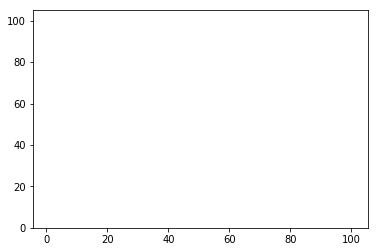

In [64]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
shell_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


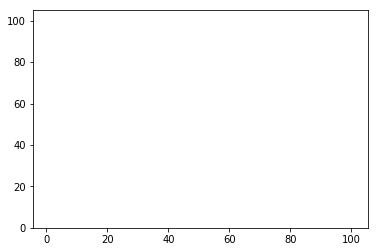

In [50]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
bubble_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


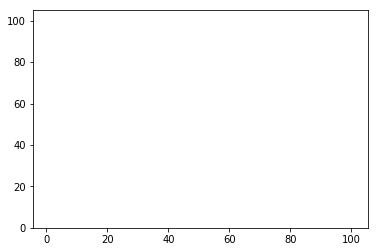

In [51]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
selection_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


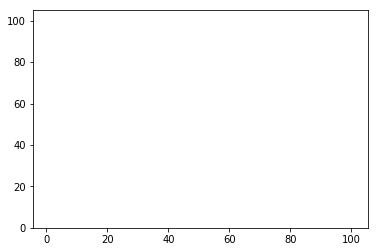

In [52]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
intersection_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


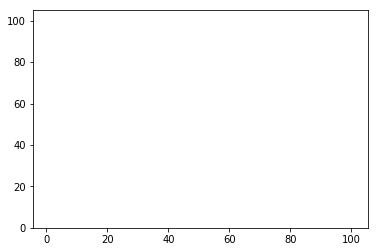

In [53]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
merge_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


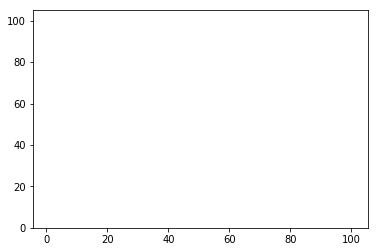

In [54]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
fig = plt.figure()
ims=[]   
X=np.arange(1,N+1)
quick_sort_anime(L,0,N)
ani = animation.ArtistAnimation(fig, ims, interval=100)
ani.save("sort_quick.gif", writer="imagemagick")
plt.show() 

MovieWriter imagemagick unavailable.


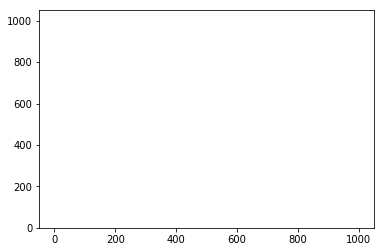

In [5]:
N=1000
L=[i+1 for i in range(N)]
random.shuffle(L)
radix_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


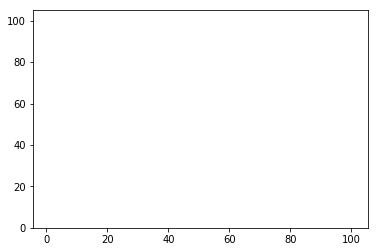

In [33]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
gravity_sort_anime(L)
print()